<a href="https://colab.research.google.com/github/TEERAWATL/Bayesian_network/blob/main/bayesian_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
data = pd.DataFrame({
    'age': [18, 26, 31, 25, 30, 45, 40, 35, 50, 60, 65, 66, 50, 49, 32, 61, 65,],
    'heart_disease': [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1],
    'blood_pressure': [125.11, 124.73, 139.07, 136.26, 142.95, 134.55, 127.94, 143.93, 151.97, 151.52, 139.88, 168.84, 144.85, 154.33, 150.92, 141.34, 153.44],
    'cholesterol': [209.43, 220.87, 244.22, 223.20, 270.66, 311.34, 325.56, 232.96, 312.56, 333.49, 318.82, 326.10, 258.60, 315.86, 229.89, 294.47, 312.75]
})
data

,age,heart_disease,blood_pressure,cholesterol
0,18,0,125.11,209.43
1,26,0,124.73,220.87
2,31,0,139.07,244.22
3,25,0,136.26,223.20
4,30,0,142.95,270.66
5,45,1,134.55,311.34
6,40,1,127.94,325.56
7,35,0,143.93,232.96
8,50,1,151.97,312.56
9,60,1,151.52,333.49


In [4]:
# Discretize the age
bins = [0, 12, 20, 35, 50, 60, 100]
labels = ['0-12', '13-20', '21-35', '36-50', '50-60', '60-100']
data['age'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)

# Discretize the blood_pressure
bins = [0, 135, 200]
labels = ['normal', 'high']
data['blood_pressure'] = pd.cut(data['blood_pressure'], bins=bins, labels=labels, include_lowest=True)

# Discretize the cholesterol
bins = [0, 300, 400]
labels = ['normal', 'high']
data['cholesterol'] = pd.cut(data['cholesterol'], bins=bins, labels=labels, include_lowest=True)

data


,age,heart_disease,blood_pressure,cholesterol
0,13-20,0,normal,normal
1,21-35,0,normal,normal
2,21-35,0,high,normal
3,21-35,0,high,normal
4,21-35,0,high,normal
5,36-50,1,normal,high
6,36-50,1,normal,high
7,21-35,0,high,normal
8,36-50,1,high,high
9,50-60,1,high,high


In [5]:
#Create a Bayesian network
model = BayesianModel([('age', 'heart_disease'), ('blood_pressure', 'heart_disease'), ('cholesterol', 'heart_disease')])

/usr/local/lib/python3.10/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [6]:
#Fit the Bayesian network to the data
model.fit(data, estimator=MaximumLikelihoodEstimator)

In [9]:
print("Structure (edges) of the Bayesian Network: ", model.edges())

Structure (edges) of the Bayesian Network:  [('age', 'heart_disease'), ('blood_pressure', 'heart_disease'), ('cholesterol', 'heart_disease')]


In [10]:
# Print the parameters estimated by the model
for cpd in model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)


CPD of age:
+-------------+-----------+
| age(13-20)  | 0.0588235 |
+-------------+-----------+
| age(21-35)  | 0.352941  |
+-------------+-----------+
| age(36-50)  | 0.294118  |
+-------------+-----------+
| age(50-60)  | 0.0588235 |
+-------------+-----------+
| age(60-100) | 0.235294  |
+-------------+-----------+
CPD of heart_disease:
+------------------+-----+------------------------+
| age              | ... | age(60-100)            |
+------------------+-----+------------------------+
| blood_pressure   | ... | blood_pressure(normal) |
+------------------+-----+------------------------+
| cholesterol      | ... | cholesterol(normal)    |
+------------------+-----+------------------------+
| heart_disease(0) | ... | 0.5                    |
+------------------+-----+------------------------+
| heart_disease(1) | ... | 0.5                    |
+------------------+-----+------------------------+
CPD of blood_pressure:
+------------------------+----------+
| blood_pressure(high)   

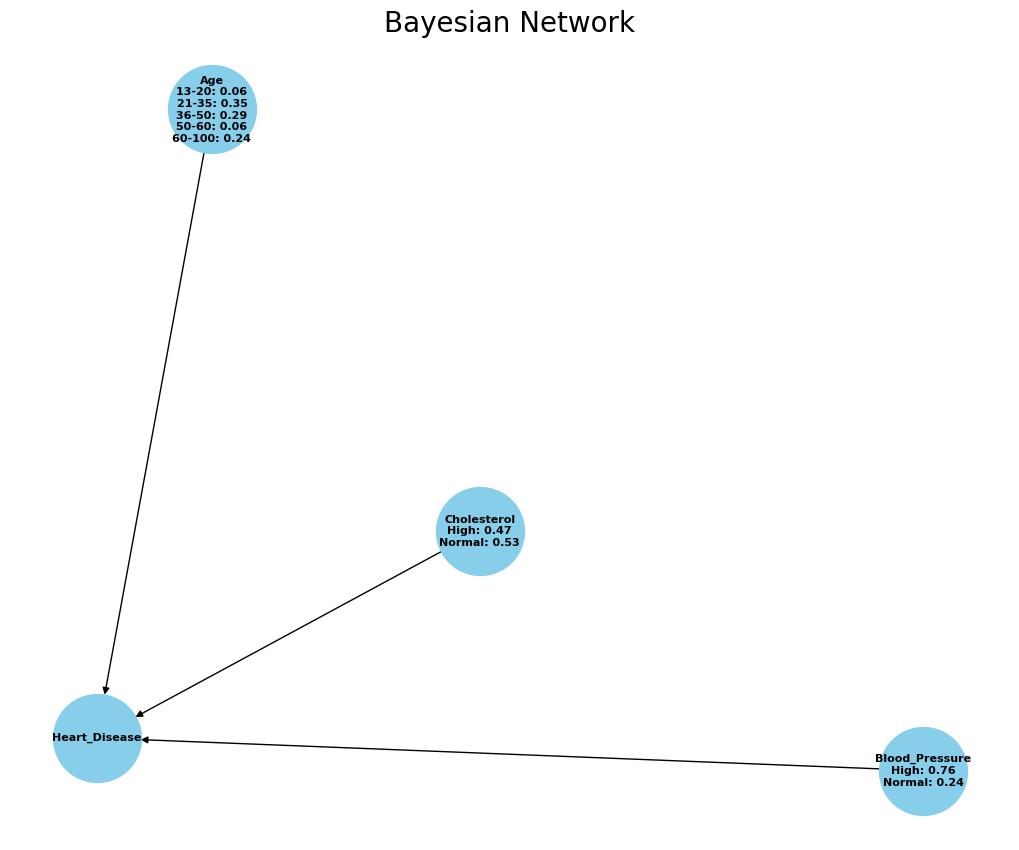

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph with their probabilities
G.add_node('Age\n13-20: 0.06\n21-35: 0.35\n36-50: 0.29\n50-60: 0.06\n60-100: 0.24')
G.add_node('Heart_Disease')
G.add_node('Blood_Pressure\nHigh: 0.76\nNormal: 0.24')
G.add_node('Cholesterol\nHigh: 0.47\nNormal: 0.53')

# Add edges between nodes (indicating dependencies)
G.add_edge('Age\n13-20: 0.06\n21-35: 0.35\n36-50: 0.29\n50-60: 0.06\n60-100: 0.24', 'Heart_Disease')
G.add_edge('Blood_Pressure\nHigh: 0.76\nNormal: 0.24', 'Heart_Disease')
G.add_edge('Cholesterol\nHigh: 0.47\nNormal: 0.53', 'Heart_Disease')

# Draw the graph
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=4000, node_color="skyblue", font_size=8, font_weight='bold')
plt.title('Bayesian Network', size=20)
plt.show()


## A Conditional Probability Distribution (CPD)
In this case, is basically telling us the probability of different outcomes for each variable, possibly given the states of other variables (those it depends on). Let's break it down:

1. CPD of age: This tells us the probability distribution of the age variable. For example, the probability of a person falling into the '13-20' age category is approximately 0.0588 or about 5.88%.

2. CPD of heart_disease: This is a conditional probability distribution. It tells us the probability of having heart_disease given the values of age, blood_pressure, and cholesterol. Because heart_disease is a binary variable (0 or 1), each probability is presented as a table conditional on the other variables. For example, given that a person is aged '60-100', has normal blood pressure and normal cholesterol, the probability of having heart disease (0 or 1) is 0.5 or 50%.

3. CPD of blood_pressure: This tells us the probability distribution of the blood_pressure variable. The probability of having high blood pressure is approximately 0.7647 or about 76.47%, while the probability of having normal blood pressure is approximately 0.2353 or about 23.53%.

4. CPD of cholesterol: This tells us the probability distribution of the cholesterol variable. The probability of having high cholesterol is approximately 0.4706 or about 47.06%, while the probability of having normal cholesterol is approximately 0.5294 or about 52.94%.

In [29]:
from pgmpy.inference import VariableElimination

# Create an inference object
infer = VariableElimination(model)

# Define the evidence
evidence = {'age': '13-20', 'blood_pressure': 'high', 'cholesterol': 'high'}

# Perform query
query_result = infer.query(variables=['heart_disease'], evidence=evidence)

# Print the result
print(query_result)


+------------------+----------------------+
| heart_disease    |   phi(heart_disease) |
+==================+======================+
| heart_disease(0) |               0.5000 |
+------------------+----------------------+
| heart_disease(1) |               0.5000 |
+------------------+----------------------+


In [33]:
import json

# Get the values and states
values = query_result.values.tolist()
states = query_result.state_names['heart_disease']

# Create a dictionary
result_dict = {state: value for state, value in zip(states, values)}

# Convert numpy.int64 keys to int
result_dict = {int(state): float(value) for state, value in zip(states, values)}

# Convert the dictionary to a JSON object
result_json = json.dumps(result_dict)

print(result_json)

{"0": 0.5, "1": 0.5}


In [35]:
#from pgmpy.inference import VariableElimination

# Split data into training and testing set
#train_data = data.sample(frac=0.8, random_state=1)
#test_data = data.drop(train_data.index)

# Fit the model to the training data
#model.fit(train_data)

# Initialize the VariableElimination class
#infer = VariableElimination(model)

# List to store predictions
#predictions = []

# Iterate through the test data
#for _, data_point in test_data.iterrows():
    # Get the probabilities for each class
    #probs = infer.map_query(variables=['heart_disease'], evidence=data_point.to_dict())['heart_disease']
    
    # If probability of class 1 is greater than 0.5, predict 1, else predict 0
    #prediction = 1 if probs.values[1] > 0.5 else 0
    
    # Append prediction to list
    #predictions.append(prediction)

# Now you have your predictions and can compute a confusion matrix

# Get the actual values of the target variable
#actual = test_data['heart_disease'].values

# Compute the confusion matrix
#cm = confusion_matrix(actual, predictions)

#print(cm)